In [3]:
import os
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, set_link_color_palette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sep = '/'
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='#f2efef'

In [4]:
font = {'fontname':'Calibri'}

In [5]:
fr_thresh = 4.5
ISI_thresh = 0.55
recording = r'F:'
filename = 'concatenated_stats.csv'

In [6]:
df = pd.read_csv(os.sep.join([recording, filename]))
df.index.name = 'Cluster_ID'
df = df[pd.notnull(df['SW_troff'])]

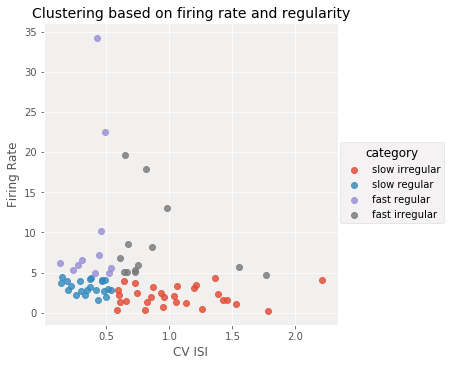

In [7]:
sns.lmplot(data=df, x='CV ISI', y='Firing Rate', fit_reg=False, hue='category')
plt.title('Clustering based on firing rate and regularity', fontsize=14)
plt.show()

recording
2018-04-12_371b    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-16_401b    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-17_401c    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-18         AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-01_01      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

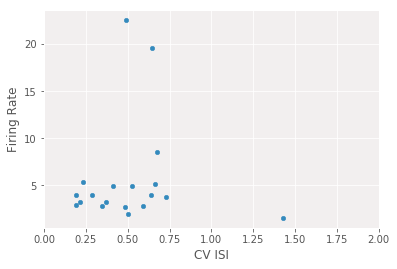

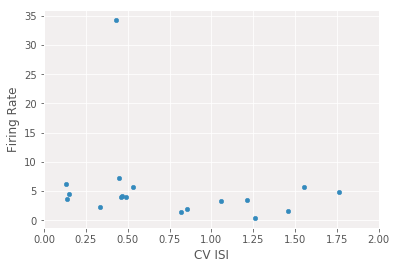

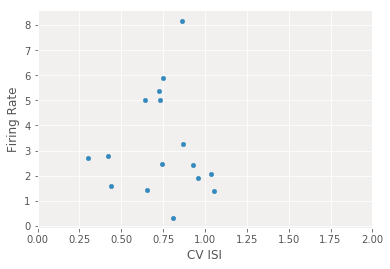

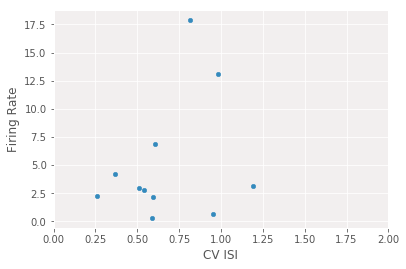

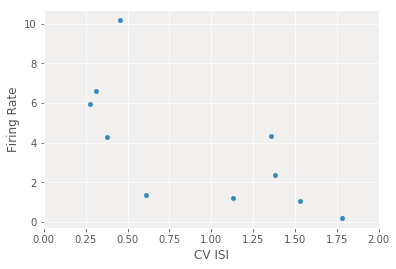

In [8]:
df.groupby(by='recording').plot(x='CV ISI', y='Firing Rate', kind='scatter', xlim=[0, 2])

# Take out recording and clusters

In [9]:
df= df[df['recording'] != '2018-04-17_401c']

In [11]:
df = df[(df['Cluster_ID'] != 37) & (df['Cluster_ID'] != 33)]
df.to_csv(r'F:\new_concatenated_stats.csv')

### Dendrogram

In [12]:
scale = StandardScaler()
scaled_data = scale.fit_transform(df[['CV ISI', 'Firing Rate']])
data_for_dendrogram = linkage(scaled_data)

In [17]:
distance = 0.65
path = r'C:\Users\ASUS\Desktop\Images'

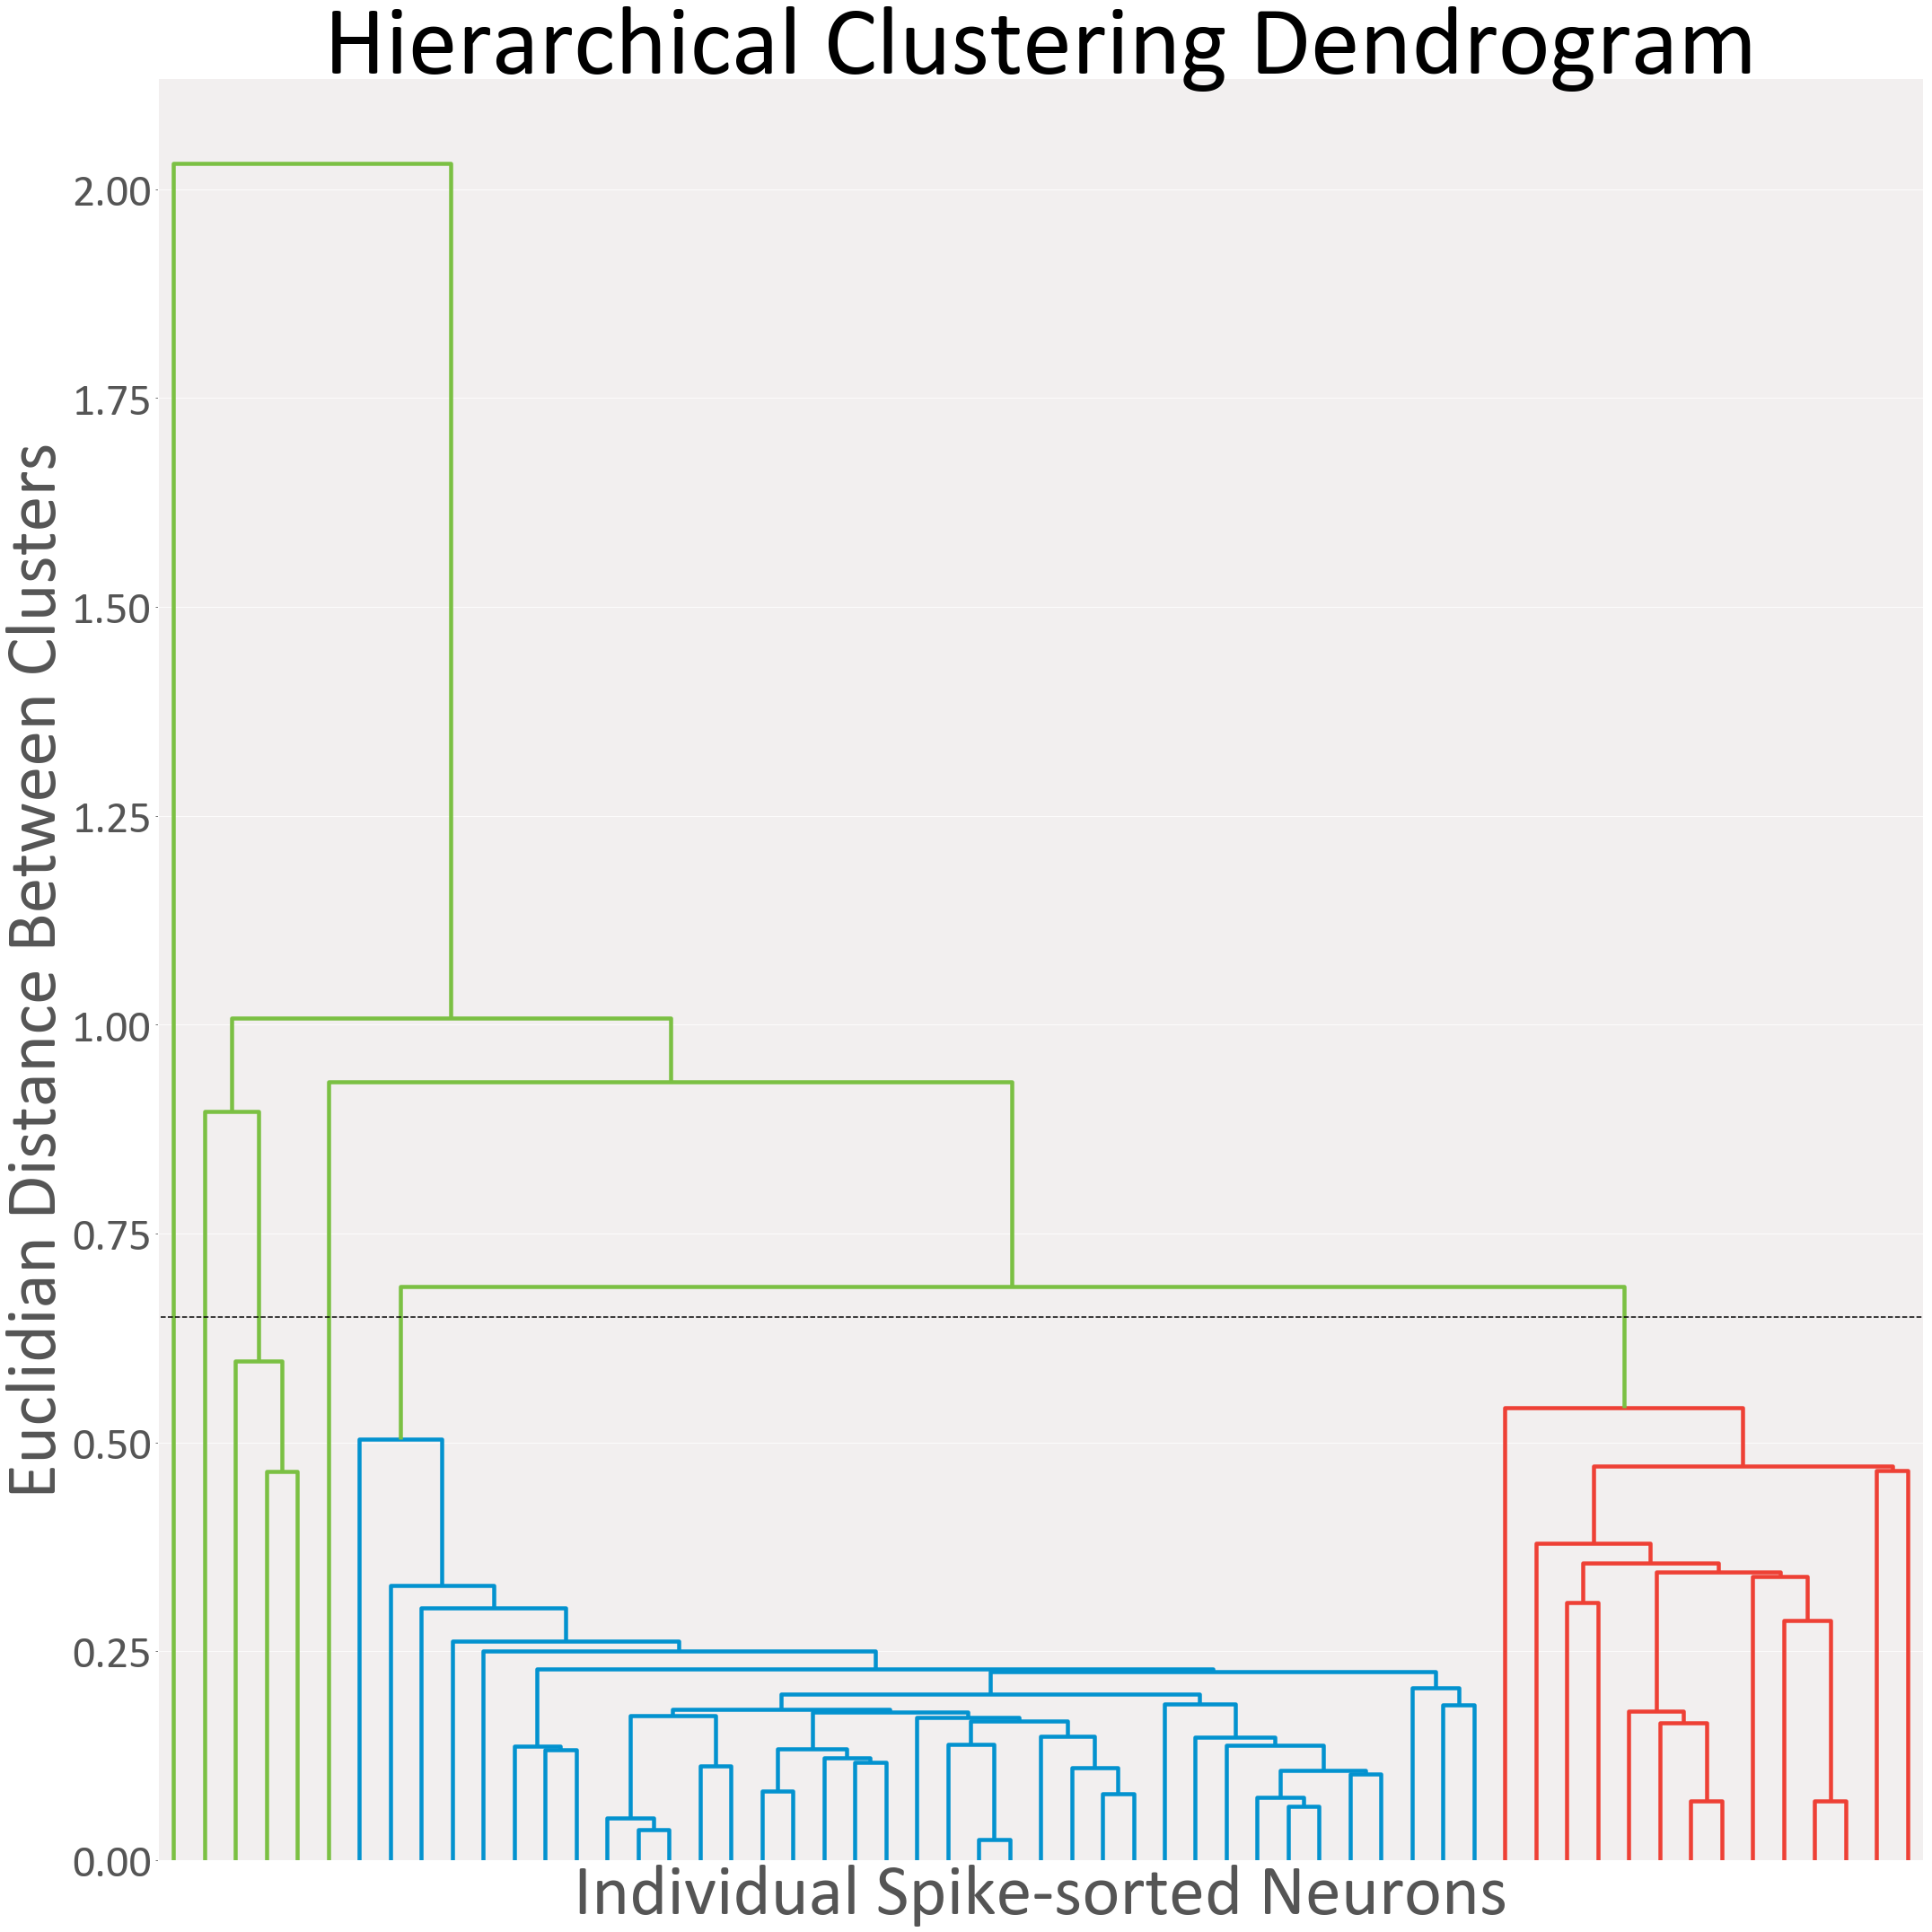

In [55]:
f, ax = plt.subplots(figsize=(30, 30))
ax.set_title('Hierarchical Clustering Dendrogram', **font, fontsize=110)
ax.set_ylabel('Euclidian Distance Between Clusters', **font, fontsize=80)
set_link_color_palette(['#7bc043','#0392cf', '#ee4035'])

with plt.rc_context({'lines.linewidth':4.5}):
    dendrogram(
        data_for_dendrogram,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        color_threshold=distance,
        above_threshold_color='#7bc043',
        no_labels = True,
        distance_sort = True,
        ax=ax
    )
ax.set_xlabel('Individual Spike-sorted Neurons', **font, fontsize=80)
plt.yticks(**font, fontsize=50)
line_y = np.ones(df.shape[0]*30) * distance
line_x = np.linspace(1, df.shape[0]*60, df.shape[0]*30)
plt.plot(line_x, line_y, linestyle='--', color='k')
#plt.xlabel('Cluster')
plt.tight_layout()
plt.savefig(os.sep.join([path, 'Dendrogram', 'Dendrogram.png']), dpi=600)

In [19]:
distance = distance
clusters = fcluster(data_for_dendrogram, distance, criterion='distance')
df['clusters']=clusters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
def map_color(df):
    if df == 3:
        return '#0392cf'
    elif df == 4 or df == 5:
        return '#ee4035'
    else:
        return '#7bc043'

df['colors']=df['clusters'].apply(map_color)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
def generate_name_tag(df):
    return str(df['spike_cluster']) + ' Recording: ' +df['recording']

df['name tag'] = df.apply(generate_name_tag, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

trace = go.Scatter(
    x = df['CV ISI'],
    y = df['Firing Rate'],
    mode = 'markers',
    text = df['name tag']
)

layout= go.Layout(
    title= 'Scatterplot of CV ISI vs Firing Rate',
    autosize=False,
    width=700,
    height=700,
    hovermode= 'closest',
    xaxis= dict(
        title= 'CV ISI',
        ticklen= 5,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title='Firing Rate',
        ticklen=5,
        gridwidth=1,
    ),
    showlegend=False
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
plotly.offline.iplot(fig)

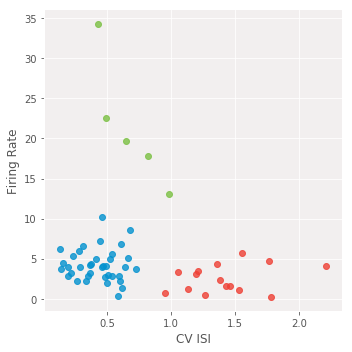

In [24]:
sns.lmplot(data=df, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='colors', palette=(['#ee4035','#0392cf', '#7bc043']))

In [25]:
df[df['colors'] == '#0392cf'].sort_values(by='CV ISI')

,Cluster_ID,spike_cluster,CV ISI,Firing Rate,recording,SW_peak,SW_return,SW_troff,base_min_amp,min_max_amp,spike_type,category,Experiment,clusters,colors,name tag
Cluster_ID,,,,,,,,,,,,,,,,
39,39,71,0.134320,6.162500,2018-04-16_401b,NaN,0.866667,0.366667,337.553114,NaN,down_up,fast regular,SERT_DREADD,3,#0392cf,71 Recording: 2018-04-16_401b
38,38,67,0.138577,3.662222,2018-04-16_401b,NaN,0.900000,0.400000,755.348398,NaN,down_up,slow regular,SERT_DREADD,3,#0392cf,67 Recording: 2018-04-16_401b
30,30,21,0.152486,4.477500,2018-04-16_401b,NaN,0.966667,0.466667,679.613514,NaN,down_up,slow regular,SERT_DREADD,3,#0392cf,21 Recording: 2018-04-16_401b
25,25,154,0.190768,3.983611,2018-04-12_371b,NaN,0.833333,0.333333,1213.301973,NaN,down_up,slow regular,SERT_DREADD,3,#0392cf,154 Recording: 2018-04-12_371b
21,21,148,0.194259,2.878056,2018-04-12_371b,NaN,0.833333,0.366667,1123.445218,NaN,down_up,slow regular,SERT_DREADD,3,#0392cf,148 Recording: 2018-04-12_371b
17,17,73,0.216213,3.276667,2018-04-12_371b,NaN,0.733333,0.300000,601.166920,NaN,down_up,slow regular,SERT_DREADD,3,#0392cf,73 Recording: 2018-04-12_371b
23,23,150,0.234410,5.358611,2018-04-12_371b,NaN,0.733333,0.400000,423.251741,NaN,down_up,fast regular,SERT_DREADD,3,#0392cf,150 Recording: 2018-04-12_371b
73,73,599,0.261148,2.241944,2018-04-18,NaN,0.933333,0.366667,636.661016,NaN,down_up,slow regular,SERT_DREADD,3,#0392cf,599 Recording: 2018-04-18
8,8,128,0.276459,5.928889,2018-05-01_01,NaN,0.800000,0.400000,471.199365,NaN,down_up,fast regular,CIT_WAY,3,#0392cf,128 Recording: 2018-05-01_01


In [26]:
df_chosen_cluster = df[(df['spike_cluster'] == 154) | (df['spike_cluster'] == 147) | (df['spike_cluster'] == 159)]

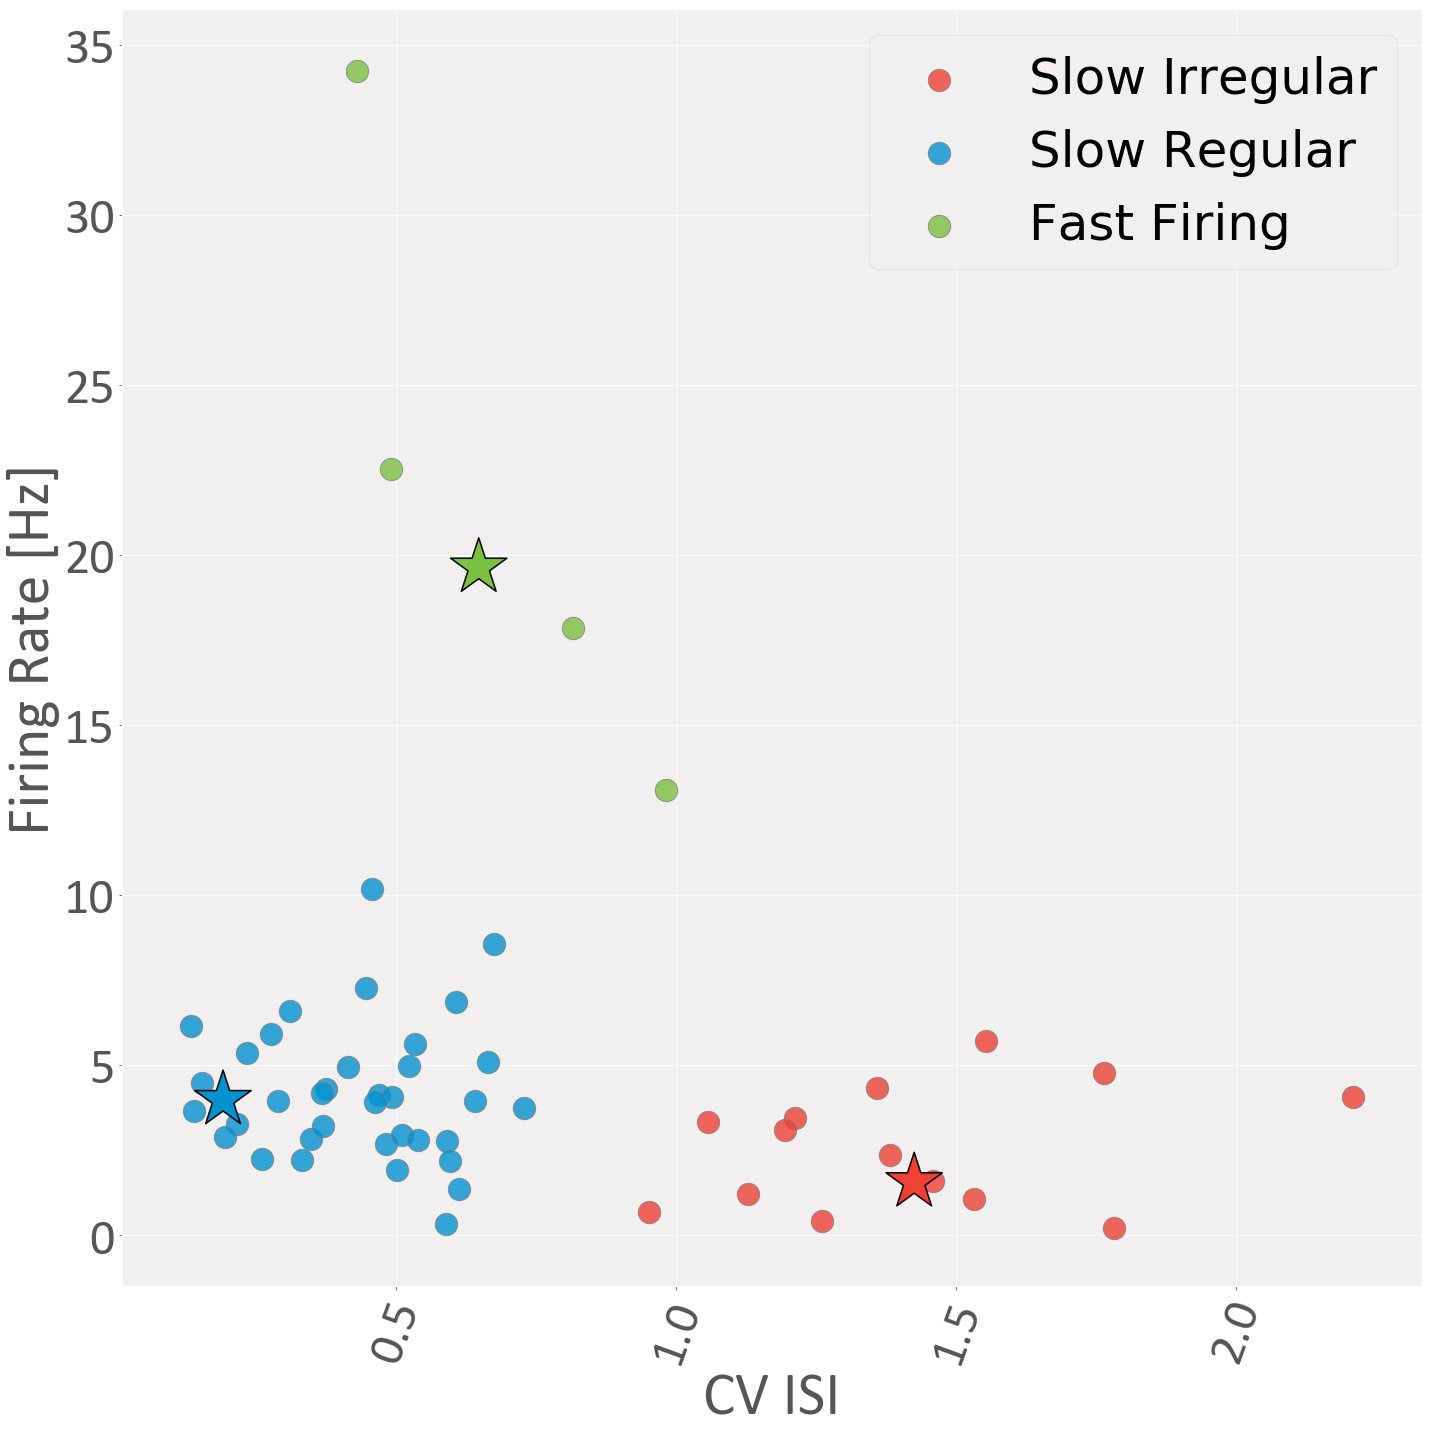

In [50]:
sns.lmplot(data=df, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='colors', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':500, 'alpha':0.8}, size=(20),  palette=['#ee4035', '#0392cf', '#7bc043'])
plt.scatter(x=df_chosen_cluster['CV ISI'], y=df_chosen_cluster['Firing Rate'], c=df_chosen_cluster['colors'], alpha=1, s=3500, edgecolors='k', linewidths=1.5, marker='*')
#plt.title('Scatterplot of Hierarchical Clustering', **font, fontsize=60)
plt.xlabel('CV ISI', **font, fontsize=60)
plt.ylabel('Firing Rate [Hz]', **font, fontsize=60)
plt.yticks(**font, fontsize=50)
plt.xticks(**font, fontsize=50, rotation=70)
plt.legend(['Slow Irregular','Slow Regular', 'Fast Firing'], prop={'size':50})
plt.tight_layout()
plt.savefig(os.sep.join([path, 'Clustered Scatterplot', 'Clustered Scatterplot.png']), dpi=600)



In [207]:
df

,Cluster_ID,spike_cluster,CV ISI,Firing Rate,recording,SW_peak,SW_return,SW_troff,base_min_amp,min_max_amp,spike_type,category,Experiment,clusters,colors,name tag
Cluster_ID,,,,,,,,,,,,,,,,
0,0,20,1.358529,4.333056,2018-05-01_01,NaN,0.533333,0.333333,349.222784,NaN,down_up,slow irregular,CIT_WAY,4,#ee4035,20 Recording: 2018-05-01_01
1,1,22,0.612568,1.365000,2018-05-01_01,0.133333,0.600000,0.333333,217.422509,450.016364,up_down_up,slow irregular,CIT_WAY,3,#0392cf,22 Recording: 2018-05-01_01
2,2,24,1.382686,2.360556,2018-05-01_01,NaN,0.533333,0.366667,307.560041,NaN,down_up,slow irregular,CIT_WAY,4,#ee4035,24 Recording: 2018-05-01_01
3,3,33,1.782948,0.206667,2018-05-01_01,0.066667,0.400000,0.266667,306.614027,399.524545,up_down_up,slow irregular,CIT_WAY,4,#ee4035,33 Recording: 2018-05-01_01
4,4,57,1.128387,1.206944,2018-05-01_01,NaN,0.666667,0.333333,708.104577,NaN,down_up,slow irregular,CIT_WAY,4,#ee4035,57 Recording: 2018-05-01_01
5,5,79,0.375290,4.284722,2018-05-01_01,0.133333,0.966667,0.366667,394.488345,510.166909,up_down_up,slow regular,CIT_WAY,3,#0392cf,79 Recording: 2018-05-01_01
6,6,82,1.532240,1.068056,2018-05-01_01,NaN,0.466667,0.333333,301.241817,NaN,down_up,slow irregular,CIT_WAY,4,#ee4035,82 Recording: 2018-05-01_01
7,7,123,0.311167,6.598333,2018-05-01_01,NaN,0.966667,0.433333,998.888597,NaN,down_up,fast regular,CIT_WAY,3,#0392cf,123 Recording: 2018-05-01_01
8,8,128,0.276459,5.928889,2018-05-01_01,NaN,0.800000,0.400000,471.199365,NaN,down_up,fast regular,CIT_WAY,3,#0392cf,128 Recording: 2018-05-01_01
